In [1]:
# prompt: Mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'sentiment_dataset.csv'))
df.dropna(subset=['review_text'], inplace=True)
df.head()


,app_id,app_name,review_text,review_score,review_votes,admiration,amusement,anger,annoyance,approval,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cluster
0,49520,Borderlands 2,"Very good game, not like any other apocalyptic...",1,1,0.749776,0.003268,0.000072,0.000206,0.028918,...,0.000016,0.004090,0.000324,0.000336,0.003867,0.000068,0.000040,0.000193,0.000423,2
1,550,Left 4 Dead 2,best game please make l4d3 please,1,1,0.539692,0.000166,0.000036,0.000061,0.003855,...,0.000006,0.004092,0.000055,0.000066,0.001623,0.000189,0.000027,0.000086,0.006437,2
2,242760,The Forest,Early Access Review,1,1,0.000714,0.000040,0.000024,0.000091,0.005753,...,0.000005,0.000069,0.000002,0.000042,0.000012,0.000022,0.000074,0.000011,0.990735,1
3,364420,Roguelands,i have only played 6.1 hours of this game and ...,1,1,0.945537,0.000359,0.000095,0.000103,0.004008,...,0.000009,0.000702,0.001023,0.000693,0.000341,0.000037,0.000052,0.023334,0.004714,2
4,217140,Rise of the Triad,One of the best games of 2013 and 'A real con...,1,1,0.990622,0.000173,0.000109,0.000025,0.001281,...,0.000007,0.000213,0.001751,0.000036,0.000082,0.000097,0.000018,0.000082,0.000218,2


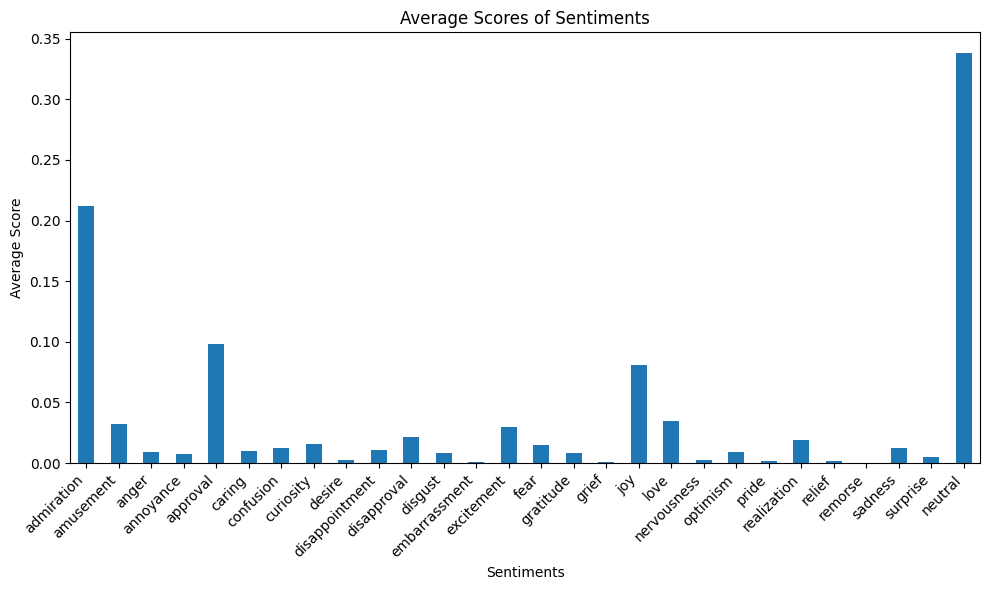

In [3]:
import matplotlib.pyplot as plt

# List of specified attributes
attributes = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


# Calculate the average for each attribute
averages = df[attributes].mean()

# Create a bar plot for the averages
plt.figure(figsize=(10, 6))
averages.plot(kind='bar')
plt.title('Average Scores of Sentiments')
plt.ylabel('Average Score')
plt.xlabel('Sentiments')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels

# Show the plot
plt.show()


In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Assuming df[attributes] is your feature matrix X
X = df[attributes].values

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(X)

# Convert similarity matrix to distance matrix
cosine_dist_matrix = 1 - cosine_sim_matrix

# Cluster using DBSCAN with precomputed cosine distance matrix
dbscan = DBSCAN(eps=0.2, min_samples=4, metric='precomputed')
df['cluster'] = dbscan.fit_predict(cosine_dist_matrix)


ValueError: Negative values in data passed to precomputed distance matrix.

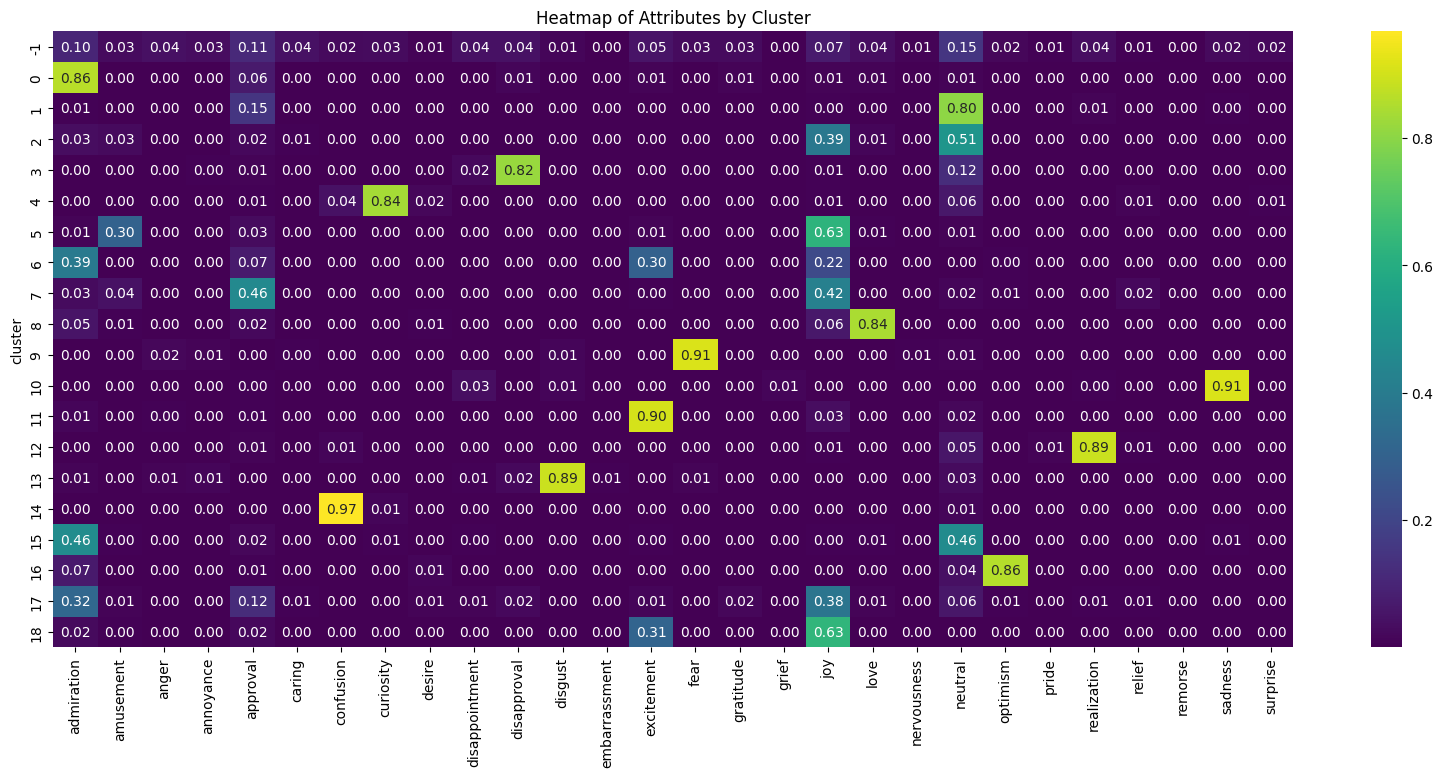

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
pivot_table = df.pivot_table(index='cluster', values=attributes, aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Attributes by Cluster')
plt.show()

In [6]:
for cluster_no in range(-1,17):
  print("cluster:", cluster_no)
  for text_index in range(3):
    review_text = df.loc[df['cluster'] == cluster_no, 'review_text'].iloc[text_index]
    print(review_text)
  print("-----------------")
  print()

cluster: -1
best game please make l4d3 please
10/10 - IGN xD  But on a serious note...  Don't buy it if it isn't on sale!
billions of hours may be spent looting the world-renowned knoxx armory for light orange terrible defenders
-----------------

cluster: 0
Very good game, not like any other apocalyptic game, this one was written to be fun to play and to enjoy great time with friends.
i have only played 6.1 hours of this game and my experience with this game is AMAZING GIVE ALL THE LOVE YOU CAN TO THE CREATOR THEY DESERVE IT!!!                                                          JUST DO IT  (EDIT: when i wrote this review i had 6.1 hours ... now i have 331 hours and i can say these 2 things with total confidence, 1. it is a good game with a friendly creator and friendly community but, 2. it does need more work, now i know that it is a 1 man team but as of 1.0 or even 1.3 it isn't actually done but Sean can be proud of what he has made whether people like it or hate it just know t

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd


# Assuming df is your DataFrame and it's already loaded with 'attributes' and 'cluster'

# Prepare the dataset
X = df[attributes].values  # Your features
y = df['cluster'].values   # Your labels

# Ensure labels start from 0 and are consecutive
unique_labels = np.unique(y)
label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
y_mapped = np.vectorize(label_mapping.get)(y)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_mapped, dtype=torch.long)

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

input_size = X.shape[1]
output_size = len(np.unique(y_mapped))  # Updated to use y_mapped
model = Net(input_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the model
torch.save(model, os.path.join('/content/drive/MyDrive', 'Project', 'cluster_model.pt'))
print('Model saved!')


Epoch [1/5], Loss: 0.0322
Epoch [2/5], Loss: 0.0351
Epoch [3/5], Loss: 0.0149
Epoch [4/5], Loss: 0.9570
Epoch [5/5], Loss: 0.0436
Model saved!


In [ ]:
from transformers import pipeline
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')

class Classifier():
  def __init__(self):
    print(input_size, output_size)
    self.model = Net(input_size, output_size)
    self.model.load_state_dict(torch.load("model.pth"))
    self.nlp = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa', return_all_scores=True)
    self.compiled_re = re.compile(r'[^a-zA-Z\s]')

  def preprocess_reviews(self, text):
      stop_words = set(stopwords.words('english'))
      text = self.compiled_re.sub('', text).lower()
      tokens = word_tokenize(text)

      return " ".join(tokens)

  def average_sentiments(self, sentiments_list):
    sentiment_sums = {}
    sentiment_counts = {}
    for sentiments in sentiments_list:
        for sentiment in sentiments:
            label = sentiment['label']
            score = sentiment['score']
            if label in sentiment_sums:
                sentiment_sums[label] += score
                sentiment_counts[label] += 1
            else:
                sentiment_sums[label] = score
                sentiment_counts[label] = 1

    # Calculate the average score for each sentiment
    average_sentiments = {label: sentiment_sums[label] / sentiment_counts[label] for label in sentiment_sums}

    return average_sentiments

  def predict(self, review_text):
    review_text = self.preprocess_reviews(review_text)
    # Split the review text into segments of up to 512 characters
    review_text_segments = [review_text[i:i+512] for i in range(0, len(review_text), 512)]
    results = []

    # Analyze the sentiment of each text segment
    for segment in review_text_segments:
        segment = segment[:512]  # Ensure segment is not longer than 512 characters
        result = self.nlp(segment, return_all_scores=True)
        results.extend(result)

    # Average the sentiment scores from all segments
    average_sentiments_list = self.average_sentiments(results)

    # Convert the averaged sentiments into a tensor (if needed for further processing)
    sentiment_vector = [average_sentiments_list[key] for key in sorted(average_sentiments_list.keys())]
    sentiment_tensor = torch.tensor(sentiment_vector).float().unsqueeze(0)  # Add batch dimension if needed

    # Pass the sentiment tensor through the model
    net_output = self.model(sentiment_tensor)

    # Get the index of the maximum value (argmax)
    _, predicted_index = torch.max(net_output, dim=1)  # Assuming net_output is 2D: [batch_size, num_classes]

    return predicted_index.item() -1 # Return the index as a Python int


In [ ]:
classifier = Classifier()

FileNotFoundError: [Errno 2] No such file or directory: 'model.pth'

In [ ]:
prediction = classifier.predict("this is a review I love this game SO MUCH")

In [ ]:
print(prediction)

In [ ]:
import pickle

# Assuming Classifier is your class and you've already initialized an instance of it
classifier = Classifier()

# Save the classifier object to a file using pickle
with open('classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)

print("Classifier saved successfully.")
